In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, precision_score
from sklearn.model_selection import train_test_split

In [25]:
df = pd.read_csv("dataFrameFinal.csv")

In [7]:
df

,cost,attack,health,is_SECRET,is_HEROPOWER_DAMAGE,is_RECEIVES_DOUBLE_SPELLDAMAGE_BONUS,is_INSPIRE,is_BATTLECRY,is_DEATHRATTLE,is_OVERHEAL,...,set_YEAR_OF_THE_DRAGON,type_LOCATION,type_MINION,type_SPELL,type_WEAPON,rarity_COMMON,rarity_EPIC,rarity_FREE,rarity_LEGENDARY,rarity_RARE
0,5.0,-1.0,-1.0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
1,3.0,-1.0,-1.0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,2.0,3.0,2.0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,1.0,-1.0,-1.0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,3.0,-1.0,-1.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5840,2.0,1.0,4.0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
5841,1.0,1.0,3.0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
5842,3.0,-1.0,-1.0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
5843,9.0,9.0,9.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [26]:
#on essaye de prédire si la carte est de rareté légendaire ou non
y=df.rarity_LEGENDARY.values

all_target = ["arity_COMMON", "rarity_EPIC","rarity_FREE","rarity_LEGENDARY", "rarity_RARE"]
variable = [col for col in df.columns  if col not in  all_target]
X=df[variable]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [78]:
#KNN, compliqué puisuque l'on a 553 features qualitative
split_accuracy = []
split_precision = []
best_accuracy = 0
best_k = 0
best_p = 0 

#for t in range(1, 3, 1) : 
   # print(f"================ p={t}")
for i in range(1, 20, 1):
        
        knn = KNeighborsClassifier(n_neighbors=i, p=1)
        knn.fit(X_train, y_train)
        print(f"k={i}")
        prediction = knn.predict(X_test)
        accuracy = accuracy_score(y_test, prediction)
        print(f"Accuracy: {accuracy_score(y_test, prediction)}")
        split_accuracy.append(accuracy_score(y_test, prediction))
        split_precision.append(precision_score(y_test, prediction))
        
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_k = i
            best_p=t
    
print(f"Meilleur k avec la meilleure accuracy: k={best_k}, accuracy={best_accuracy}, p={best_p}" )

k=1
Accuracy: 0.8694412770809579
k=2
Accuracy: 0.8922462941847207
k=3
Accuracy: 0.8854047890535918
k=4
Accuracy: 0.8945267958950969
k=5
Accuracy: 0.8905359179019384
k=6
Accuracy: 0.8973774230330672
k=7
Accuracy: 0.895096921322691
k=8
Accuracy: 0.8916761687571265
k=9
Accuracy: 0.8933865450399088
k=10
Accuracy: 0.8893956670467503
k=11
Accuracy: 0.895096921322691
k=12
Accuracy: 0.8854047890535918
k=13
Accuracy: 0.8859749144811858
k=14
Accuracy: 0.8876852907639681
k=15
Accuracy: 0.8922462941847207
k=16
Accuracy: 0.8893956670467503
k=17
Accuracy: 0.8893956670467503
k=18
Accuracy: 0.8928164196123147
k=19
Accuracy: 0.8933865450399088
Meilleur k avec la meilleure accuracy: k=6, accuracy=0.8973774230330672, p=2


In [ ]:
# Meilleur k avec la meilleure accuracy: k=6, accuracy=0.8973774230330672, p=1

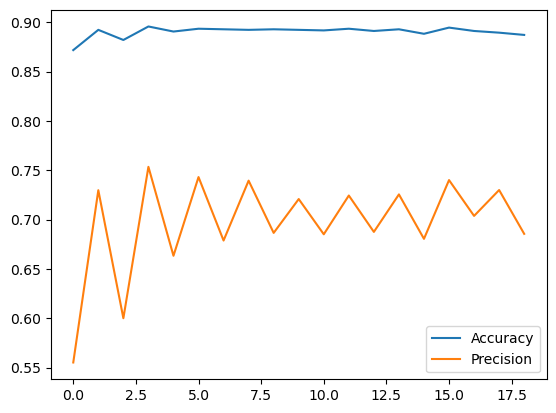

In [30]:
plt.plot(split_accuracy, label="Accuracy")
plt.plot(split_precision, label="Precision")
plt.legend()

In [ ]:
#Cross validation

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [63]:
kfold=KFold(n_splits=20,shuffle=True)

In [64]:
cross_val_accuracy = cross_val_score(estimator=knn, X=X, y=y, scoring="accuracy", cv=kfold)
cross_val_precision = cross_val_score(estimator=knn, X=X, y=y, scoring="precision", cv=kfold )
cross_val_accuracy_std = np.std(cross_val_score(estimator=knn, X=X, y=y, scoring="precision", cv=kfold))

In [82]:
best_acc = 0
best_split_acc = 0
best_prec = 0
best_split_prec = 0
best_acc_std = 1
best_split_std = 0

for i in range(2,25,1) :
    print(f" split = {i}")
    kfold=KFold(n_splits=i,shuffle=True)
    
    cross_val_accuracy = cross_val_score(estimator=knn, X=X, y=y, scoring="accuracy", cv=kfold)
    cross_val_precision = cross_val_score(estimator=knn, X=X, y=y, scoring="precision", cv=kfold )
    cross_val_accuracy_std = np.std(cross_val_score(estimator=knn, X=X, y=y, scoring="precision", cv=kfold))
    
    #print("========================================")
    #print(f"=== Average accuracy: {np.mean(cross_val_accuracy)}")
    #print(f"=== Median accuracy: {np.median(cross_val_accuracy)}")
    #print("========================================")
    #print(f"=== Average precision: {np.mean(cross_val_precision)}")
    #print(f"=== Median precision: {np.median(cross_val_precision)}")
    #print("========================================")
    #print(f"Average error on fold: {cross_val_accuracy_std}")
    #print(f"Standard error on fold: {cross_val_accuracy_std}")
    #print("========================================")
    
    

    if np.mean(cross_val_accuracy) > best_acc:
            best_acc = np.mean(cross_val_accuracy)
            best_split_acc = i

    if np.mean(cross_val_precision) > best_prec:
            best_prec = np.mean(cross_val_precision)
            best_split_prec = i

    if cross_val_accuracy_std < best_acc_std:
            best_acc_std = cross_val_accuracy_std
            best_split_std = i

print(f"Meilleur spli avec la meilleure accuracy, precision, error: accuracy={ best_acc} / {best_split_acc}, precision={best_prec} / {best_split_prec}, error={best_acc_std} / {best_split_std}" )

 split = 2
 split = 3
 split = 4
 split = 5
 split = 6
 split = 7
 split = 8
 split = 9
 split = 10
 split = 11
 split = 12
 split = 13
 split = 14
 split = 15
 split = 16
 split = 17
 split = 18
 split = 19
 split = 20
 split = 21
 split = 22
 split = 23
 split = 24
Meilleur spli avec la meilleure accuracy, precision, error: accuracy=0.8894743004332044 / 10, precision=0.7312121160519773 / 19, error=0.006527555802970153 / 2


In [ ]:
#Meilleur spli avec la meilleure accuracy, precision, error: accuracy=0.8894743004332044 / 10, precision=0.7312121160519773 / 19, error=0.006527555802970153 / 2

In [61]:
cross_val_accuracies = []
cross_val_accuracies_std = []
print(f"======== Score on fold, k = 6")
cross_val_accuracy = np.mean(cross_val_score(estimator=knn, X=X, y=y, scoring="precision", cv=kfold))
cross_val_accuracy_std = np.std(cross_val_score(estimator=knn, X=X, y=y, scoring="precision", cv=kfold))
print(f"Average error on fold: {cross_val_accuracy_std}")
print(f"Standard error on fold: {cross_val_accuracy_std}")
#cross_val_accuracies.append(cross_val_accuracy)
#cross_val_accuracies_std.append(cross_val_accuracy_std)

======== Score on fold, k = 6
Average error on fold: 0.04346798644416141
Standard error on fold: 0.04346798644416141
